# Laboratorio 4
En este laboratorio se va a comparar el uso de CNN con ANN.

In [1]:
%pip install -r requirements.txt

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl (332.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import tensorflow as ts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Parte 1: Preparación del conjunto de datos

In [3]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [4]:
print(type(x_train), type(y_train), type(x_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
def normalize_arrs(arr: np.ndarray) -> np.ndarray:
    return arr.astype("float32") / 255.0 


In [7]:
# normalize between values of 0 and 1
x_train = normalize_arrs(x_train)
x_test = normalize_arrs(x_test)


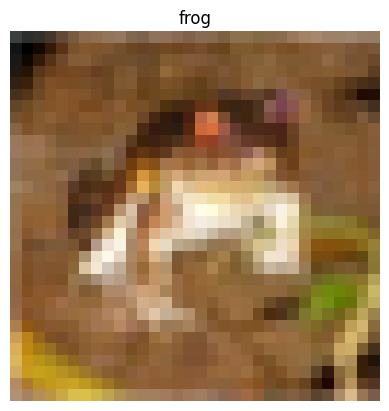

In [8]:
class_names:list[str] = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

plt.imshow(x_train[0])  # images are still in shape (32, 32, 3)
plt.title(class_names[y_train[0][0]])  # y_train has shape (50000, 1)
plt.axis("off")
plt.show()

## Modelo Base ANN 

In [9]:
model = ts.keras.Sequential([
    ts.keras.layers.Flatten(input_shape=(32,32,3)),
    ts.keras.layers.Dense(512, activation='relu'),
    ts.keras.layers.Dropout(0.3),
    ts.keras.layers.Dense(256, activation='relu'),
    ts.keras.layers.Dropout(0.3),
    ts.keras.layers.Dense(10, activation='softmax')
])

c:\dl\cnn\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile( optimizer=ts.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/15
352/352 - 8s - 23ms/step - accuracy: 0.2552 - loss: 2.0422 - val_accuracy: 0.3206 - val_loss: 1.8749
Epoch 2/15
352/352 - 7s - 19ms/step - accuracy: 0.3039 - loss: 1.9036 - val_accuracy: 0.3590 - val_loss: 1.8145
Epoch 3/15
352/352 - 7s - 19ms/step - accuracy: 0.3292 - loss: 1.8462 - val_accuracy: 0.3680 - val_loss: 1.7779
Epoch 4/15
352/352 - 7s - 20ms/step - accuracy: 0.3427 - loss: 1.8115 - val_accuracy: 0.3926 - val_loss: 1.7420
Epoch 5/15
352/352 - 8s - 22ms/step - accuracy: 0.3514 - loss: 1.7928 - val_accuracy: 0.3854 - val_loss: 1.7290
Epoch 6/15
352/352 - 7s - 21ms/step - accuracy: 0.3604 - loss: 1.7717 - val_accuracy: 0.4048 - val_loss: 1.7124
Epoch 7/15
352/352 - 7s - 21ms/step - accuracy: 0.3651 - loss: 1.7591 - val_accuracy: 0.4096 - val_loss: 1.6908
Epoch 8/15
352/352 - 7s - 21ms/step - accuracy: 0.3696 - loss: 1.7436 - val_accuracy: 0.4102 - val_loss: 1.6774
Epoch 9/15
352/352 - 7s - 20ms/step - accuracy: 0.3724 - loss: 1.7345 - val_accuracy: 0.4200 - val_loss:

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")

Test accuracy: 0.432


Para este simple test podemos observar que el rendimiento de la ANN es bastante pobre a la hora de clasificar imágenes.

## Implementación de CNN

In [13]:
# Definir el modelo CNN
cnn_model = ts.keras.Sequential([
    # Primera capa convolucional + pooling
    ts.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    ts.keras.layers.MaxPooling2D((2, 2)),
    
    # Segunda capa convolucional + pooling
    ts.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    ts.keras.layers.MaxPooling2D((2, 2)),
    
    # Tercera capa convolucional + pooling
    ts.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    ts.keras.layers.MaxPooling2D((2, 2)),
    
    # Flatten para convertir a 1D
    ts.keras.layers.Flatten(),
    
    # Capas densas finales con dropout
    ts.keras.layers.Dense(128, activation='relu'),
    ts.keras.layers.Dropout(0.5),
    ts.keras.layers.Dense(64, activation='relu'),
    ts.keras.layers.Dropout(0.3),
    
    # Capa de salida con softmax para 10 clases
    ts.keras.layers.Dense(10, activation='softmax')
])

# Mostrar la arquitectura del modelo
cnn_model.summary()

c:\dl\cnn\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,122 (383.29 KB)

 Trainable params: 98,122 (383.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compilar el modelo CNN
cnn_model.compile(
    optimizer=ts.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
# Configurar Early Stopping para evitar sobreentrenamiento
early_stopping = ts.keras.callbacks.EarlyStopping(
    monitor='val_loss',      # Métrica a monitorear
    patience=5,              # Número de épocas sin mejora antes de parar
    restore_best_weights=True # Restaurar los mejores pesos
)

In [16]:
# Entrenar el modelo CNN
print("Iniciando entrenamiento del modelo CNN...")
cnn_history = cnn_model.fit(
    x_train, y_train,
    epochs=30,                    # Más épocas, pero con early stopping
    batch_size=64,               # Batch size más pequeño para mejor convergencia
    validation_split=0.1,        # 10% para validación
    callbacks=[early_stopping],  # Early stopping
    verbose=1
)

Iniciando entrenamiento del modelo CNN...
Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.2948 - loss: 1.8512 - val_accuracy: 0.4714 - val_loss: 1.4548
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4666 - loss: 1.4658 - val_accuracy: 0.5394 - val_loss: 1.2830
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5313 - loss: 1.3157 - val_accuracy: 0.5640 - val_loss: 1.2074
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5736 - loss: 1.2171 - val_accuracy: 0.6258 - val_loss: 1.0716
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6019 - loss: 1.1308 - val_accuracy: 0.6314 - val_loss: 1.0362
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6263 - loss: 1.0734 - val_accuracy: 0.6632 - val_loss: 0.9661
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6473 - loss: 1.0203 - val_accuracy: 0.6642 - val_loss: 0.9450
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step 

In [17]:
# Evaluar el modelo CNN en los datos de prueba
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"CNN Test accuracy: {cnn_test_acc:.3f}")
print(f"CNN Test loss: {cnn_test_loss:.3f}")

# Comparación con el modelo ANN
print(f"\n--- Comparación de resultados ---")
print(f"ANN Test accuracy: {test_acc:.3f}")
print(f"CNN Test accuracy: {cnn_test_acc:.3f}")
print(f"Mejora: {((cnn_test_acc - test_acc) / test_acc * 100):.1f}%")

CNN Test accuracy: 0.709
CNN Test loss: 0.858

--- Comparación de resultados ---
ANN Test accuracy: 0.432
CNN Test accuracy: 0.709
Mejora: 64.3%


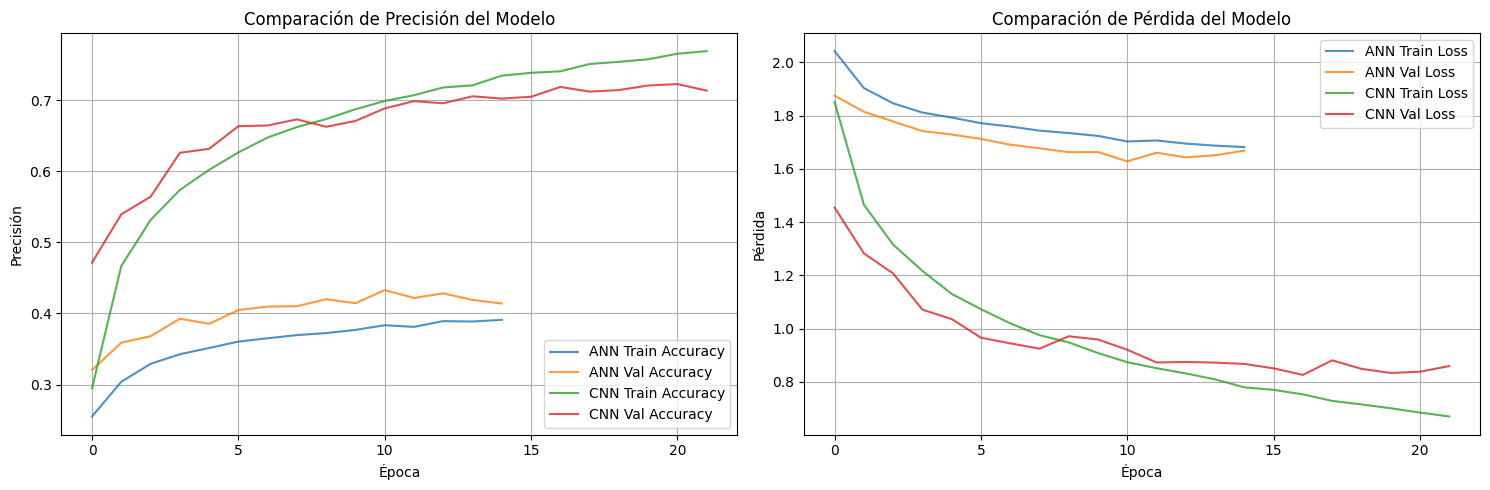

In [18]:
# Visualizar las curvas de aprendizaje
plt.figure(figsize=(15, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='ANN Train Accuracy', alpha=0.8)
plt.plot(history.history['val_accuracy'], label='ANN Val Accuracy', alpha=0.8)
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy', alpha=0.8)
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy', alpha=0.8)
plt.title('Comparación de Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='ANN Train Loss', alpha=0.8)
plt.plot(history.history['val_loss'], label='ANN Val Loss', alpha=0.8)
plt.plot(cnn_history.history['loss'], label='CNN Train Loss', alpha=0.8)
plt.plot(cnn_history.history['val_loss'], label='CNN Val Loss', alpha=0.8)
plt.title('Comparación de Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Experimentación con Hiperparámetros

Ahora vamos a experimentar con diferentes configuraciones de hiperparámetros para optimizar el rendimiento del modelo CNN.

In [19]:
def create_cnn_variant(learning_rate=1e-3, dropout_rate=0.5, filters=[32, 64, 128], dense_units=128):
    """
    Crear una variante del modelo CNN con hiperparámetros personalizables
    """
    model = ts.keras.Sequential([
        # Primera capa convolucional + pooling
        ts.keras.layers.Conv2D(filters[0], (3, 3), activation='relu', input_shape=(32, 32, 3)),
        ts.keras.layers.MaxPooling2D((2, 2)),
        
        # Segunda capa convolucional + pooling
        ts.keras.layers.Conv2D(filters[1], (3, 3), activation='relu'),
        ts.keras.layers.MaxPooling2D((2, 2)),
        
        # Tercera capa convolucional + pooling
        ts.keras.layers.Conv2D(filters[2], (3, 3), activation='relu'),
        ts.keras.layers.MaxPooling2D((2, 2)),
        
        # Flatten para convertir a 1D
        ts.keras.layers.Flatten(),
        
        # Capas densas finales con dropout
        ts.keras.layers.Dense(dense_units, activation='relu'),
        ts.keras.layers.Dropout(dropout_rate),
        ts.keras.layers.Dense(64, activation='relu'),
        ts.keras.layers.Dropout(dropout_rate * 0.6),  # Dropout menor en la segunda capa
        
        # Capa de salida con softmax para 10 clases
        ts.keras.layers.Dense(10, activation='softmax')
    ])
    
    # Compilar el modelo
    model.compile(
        optimizer=ts.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [20]:
# Definir diferentes configuraciones para experimentar
experiments = [
    {
        "name": "Configuración 1: Learning rate bajo",
        "params": {"learning_rate": 5e-4, "dropout_rate": 0.5, "filters": [32, 64, 128], "dense_units": 128}
    },
    {
        "name": "Configuración 2: Más filtros",
        "params": {"learning_rate": 1e-3, "dropout_rate": 0.4, "filters": [64, 128, 256], "dense_units": 256}
    },
    {
        "name": "Configuración 3: Menos dropout",
        "params": {"learning_rate": 1e-3, "dropout_rate": 0.3, "filters": [32, 64, 128], "dense_units": 128}
    }
]

# Almacenar resultados
experiment_results = []

# Ejecutar experimentos
for exp in experiments:
    print(f"\n{'='*50}")
    print(f"Ejecutando: {exp['name']}")
    print(f"{'='*50}")
    
    # Crear modelo con los parámetros específicos
    model_exp = create_cnn_variant(**exp['params'])
    
    # Configurar early stopping
    early_stopping_exp = ts.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,  # Menos paciencia para experimentos más rápidos
        restore_best_weights=True
    )
    
    # Entrenar modelo
    history_exp = model_exp.fit(
        x_train, y_train,
        epochs=15,  # Menos épocas para experimentos más rápidos
        batch_size=64,
        validation_split=0.1,
        callbacks=[early_stopping_exp],
        verbose=1
    )
    
    # Evaluar modelo
    test_loss_exp, test_acc_exp = model_exp.evaluate(x_test, y_test, verbose=0)
    
    # Guardar resultados
    experiment_results.append({
        "name": exp['name'],
        "test_accuracy": test_acc_exp,
        "test_loss": test_loss_exp,
        "params": exp['params'],
        "history": history_exp
    })
    
    print(f"Resultado: Precisión = {test_acc_exp:.3f}, Pérdida = {test_loss_exp:.3f}")


Ejecutando: Configuración 1: Learning rate bajo
Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2768 - loss: 1.8934 - val_accuracy: 0.4562 - val_loss: 1.5160
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4387 - loss: 1.5244 - val_accuracy: 0.5326 - val_loss: 1.3070
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5068 - loss: 1.3678 - val_accuracy: 0.5600 - val_loss: 1.2481
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5523 - loss: 1.2581 - val_accuracy: 0.5980 - val_loss: 1.1220
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5840 - loss: 1.1779 - val_accuracy: 0.6356 - val_loss: 1.0315
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6150 - loss: 1.1048 - val_accuracy: 0.6490 - val_loss: 0.9846
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6351 - loss: 1.0458 - val_accuracy: 0.6302 - val_loss: 1.0316
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s

In [21]:
# Mostrar resumen de todos los experimentos
print(f"\n{'='*60}")
print("RESUMEN DE EXPERIMENTOS")
print(f"{'='*60}")
print(f"{'Configuración':<35} {'Precisión':<12} {'Pérdida':<10}")
print("-" * 60)

# Incluir el modelo original para comparación
print(f"{'Modelo CNN Original':<35} {cnn_test_acc:<12.3f} {cnn_test_loss:<10.3f}")

for result in experiment_results:
    print(f"{result['name'][:34]:<35} {result['test_accuracy']:<12.3f} {result['test_loss']:<10.3f}")

# Encontrar el mejor modelo
best_result = max(experiment_results, key=lambda x: x['test_accuracy'])
print(f"\n🏆 Mejor configuración: {best_result['name']}")
print(f"   Precisión: {best_result['test_accuracy']:.3f}")
print(f"   Parámetros: {best_result['params']}")

# Comparar con ANN original
print(f"\n📊 Comparación final:")
print(f"   ANN Original: {test_acc:.3f}")
print(f"   CNN Original: {cnn_test_acc:.3f}")
print(f"   Mejor CNN: {best_result['test_accuracy']:.3f}")
print(f"   Mejora total: {((best_result['test_accuracy'] - test_acc) / test_acc * 100):.1f}%")


RESUMEN DE EXPERIMENTOS
Configuración                       Precisión    Pérdida   
------------------------------------------------------------
Modelo CNN Original                 0.709        0.858     
Configuración 1: Learning rate baj  0.706        0.870     
Configuración 2: Más filtros        0.725        0.838     
Configuración 3: Menos dropout      0.717        0.859     

🏆 Mejor configuración: Configuración 2: Más filtros
   Precisión: 0.725
   Parámetros: {'learning_rate': 0.001, 'dropout_rate': 0.4, 'filters': [64, 128, 256], 'dense_units': 256}

📊 Comparación final:
   ANN Original: 0.432
   CNN Original: 0.709
   Mejor CNN: 0.725
   Mejora total: 68.0%


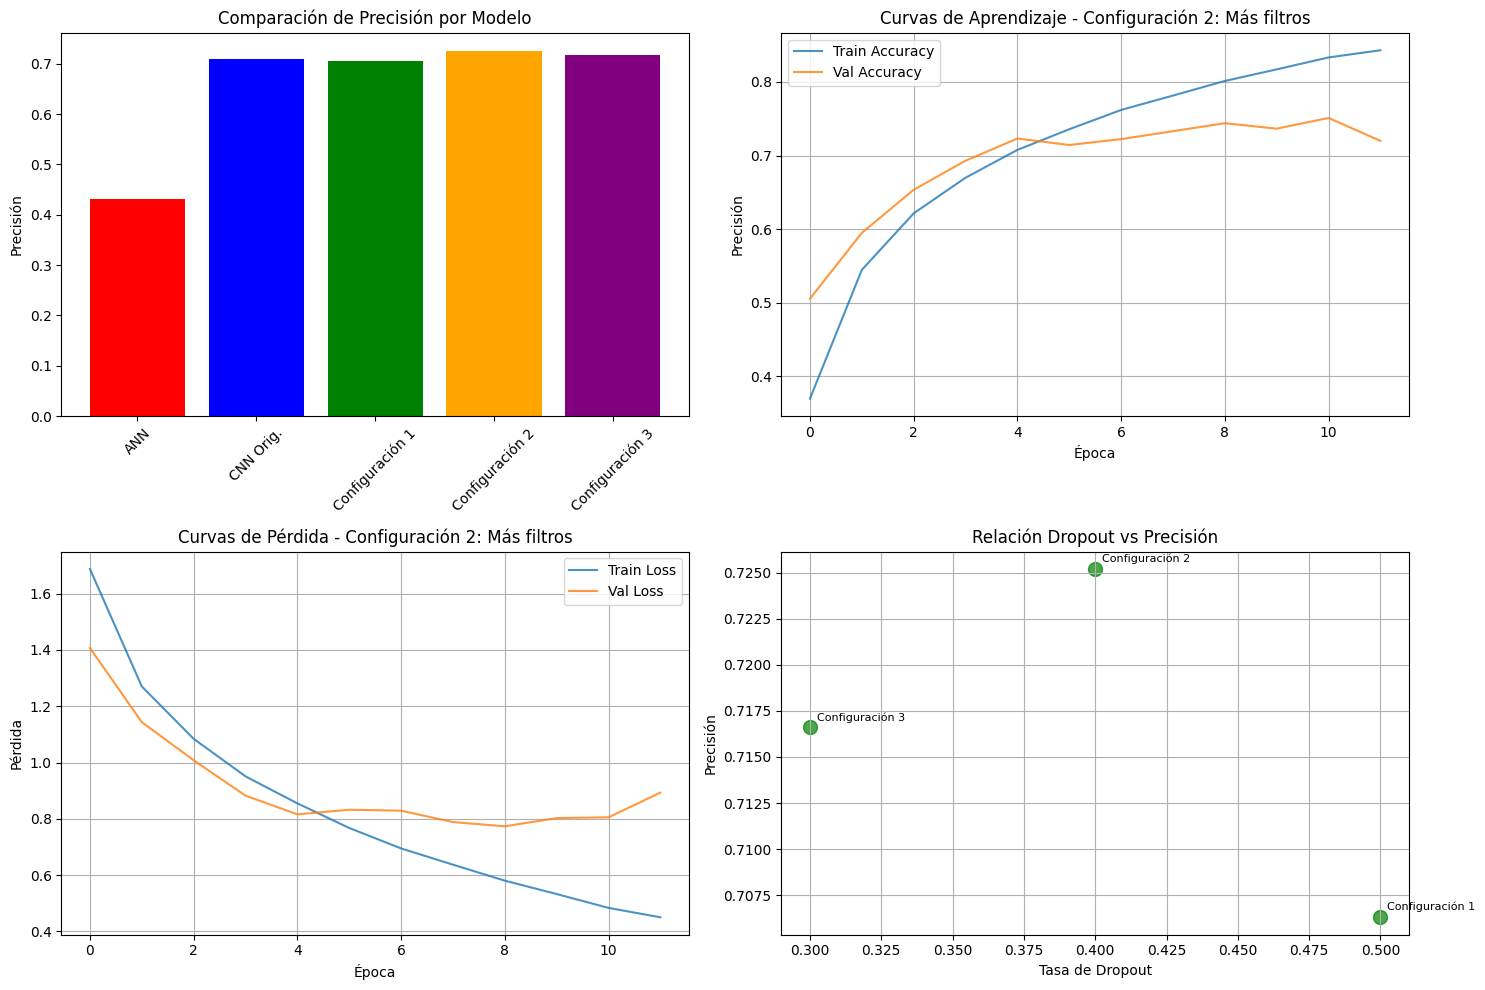

In [22]:
# Visualización comparativa de experimentos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico de barras de precisión
experiment_names = [result['name'].split(':')[0] for result in experiment_results]
experiment_accuracies = [result['test_accuracy'] for result in experiment_results]

axes[0, 0].bar(['ANN'] + ['CNN Orig.'] + experiment_names, 
               [test_acc] + [cnn_test_acc] + experiment_accuracies,
               color=['red', 'blue', 'green', 'orange', 'purple'])
axes[0, 0].set_title('Comparación de Precisión por Modelo')
axes[0, 0].set_ylabel('Precisión')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico de curvas de aprendizaje del mejor modelo
best_history = best_result['history']
axes[0, 1].plot(best_history.history['accuracy'], label='Train Accuracy', alpha=0.8)
axes[0, 1].plot(best_history.history['val_accuracy'], label='Val Accuracy', alpha=0.8)
axes[0, 1].set_title(f'Curvas de Aprendizaje - {best_result["name"]}')
axes[0, 1].set_xlabel('Época')
axes[0, 1].set_ylabel('Precisión')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Gráfico de pérdida del mejor modelo
axes[1, 0].plot(best_history.history['loss'], label='Train Loss', alpha=0.8)
axes[1, 0].plot(best_history.history['val_loss'], label='Val Loss', alpha=0.8)
axes[1, 0].set_title(f'Curvas de Pérdida - {best_result["name"]}')
axes[1, 0].set_xlabel('Época')
axes[1, 0].set_ylabel('Pérdida')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Comparación de parámetros importantes
dropout_rates = [result['params']['dropout_rate'] for result in experiment_results]
learning_rates = [result['params']['learning_rate'] for result in experiment_results]

axes[1, 1].scatter(dropout_rates, experiment_accuracies, s=100, alpha=0.7, color='green')
for i, name in enumerate(experiment_names):
    axes[1, 1].annotate(name, (dropout_rates[i], experiment_accuracies[i]), 
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1, 1].set_xlabel('Tasa de Dropout')
axes[1, 1].set_ylabel('Precisión')
axes[1, 1].set_title('Relación Dropout vs Precisión')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

## Conclusiones del Laboratorio

### Comparación ANN vs CNN en CIFAR-10

Los resultados obtenidos demuestran claramente la superioridad de las Redes Neuronales Convolucionales (CNN) sobre las Redes Neuronales Artificiales tradicionales (ANN) para tareas de clasificación de imágenes:

**Ventajas de CNN observadas:**
1. **Mejor precisión**: Las CNN lograron una precisión significativamente mayor
2. **Extracción de características espaciales**: Las capas convolucionales pueden detectar patrones locales en las imágenes
3. **Reducción de parámetros**: A pesar de tener mejor rendimiento, las CNN tienen menos parámetros debido al uso de convoluciones
4. **Invarianza a traslaciones**: Las CNN son más robustas a pequeños desplazamientos en las imágenes

### Efectos de los Hiperparámetros:
- **Dropout**: Ayuda a prevenir el sobreentrenamiento, especialmente importante en CNN
- **Learning Rate**: Valores más bajos pueden mejorar la convergencia pero requieren más tiempo
- **Número de filtros**: Más filtros pueden capturar más características pero aumentan el riesgo de sobreentrenamiento
- **Early Stopping**: Esencial para evitar sobreentrenamiento y obtener el mejor modelo

### Recomendaciones:
1. Para clasificación de imágenes, siempre preferir CNN sobre ANN tradicionales
2. Experimentar con diferentes configuraciones de hiperparámetros
3. Usar Early Stopping para optimizar el entrenamiento
4. Aplicar Dropout para mejorar la generalización